In [22]:
from bin.disorder.data_utils import load_chezod_dataset, load_chezod_dataset_two_files, load_disprot_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context='paper', style="darkgrid", font="serif", font_scale=1.1, palette=None)

### flDPnn set

In [2]:
train_fld_full = pd.DataFrame(load_disprot_dataset('../data/disprot/flDPnn_Training_Annotation.txt', max_length=10000, skip_first=10, lines_per_entry=7).rows)
val_fld_full = pd.DataFrame(load_disprot_dataset('../data/disprot/flDPnn_Validation_Annotation.txt', max_length=10000, skip_first=10, lines_per_entry=7).rows)
test_fld_full = pd.DataFrame(load_disprot_dataset('../data/disprot/flDPnn_Test_Annotation.txt', max_length=10000, skip_first=10, lines_per_entry=7).rows)

In [3]:
train_fld_full['seq_len'] = train_fld_full['label'].str.len()
val_fld_full['seq_len'] = val_fld_full['label'].str.len()
test_fld_full['seq_len'] = test_fld_full['label'].str.len()

train_fld_full['disorder_ratio'] = train_fld_full['label'].str.count('1') / train_fld_full['seq_len']
val_fld_full['disorder_ratio'] = val_fld_full['label'].str.count('1') / val_fld_full['seq_len']
test_fld_full['disorder_ratio'] = test_fld_full['label'].str.count('1') / test_fld_full['seq_len']

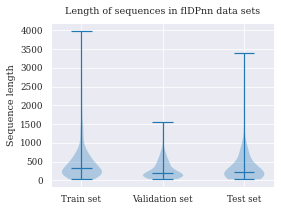

In [21]:
%matplotlib inline
fig, ax = plt.subplots(nrows=1, figsize=(4, 3))

ax.violinplot(dataset = [train_fld_full['seq_len'], val_fld_full['seq_len'], test_fld_full['seq_len']], showmedians=True)
ax.yaxis.grid(True)
ax.set_title('Length of sequences in flDPnn data sets', y=1.02)
ax.set_ylabel('Sequence length')
ax.set_xticks([1, 2, 3], ['Train set', 'Validation set', 'Test set'])

fig.savefig('../figures/2022-10-09_thesis_figures/violin_flDPnn_sequence_length.png', bbox_inches='tight')
plt.show()

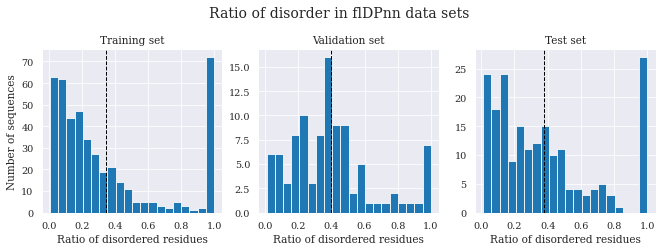

In [23]:
%matplotlib inline
fig, [ax1, ax2, ax3] = plt.subplots(ncols=3, figsize=(11, 3))
fig.suptitle('Ratio of disorder in flDPnn data sets', fontsize=14, y=1.08)

ax1.hist(train_fld_full['disorder_ratio'], bins=20)
ax1.axvline(train_fld_full['disorder_ratio'].mean(), color='k', linestyle='dashed', linewidth=1)
ax1.set_title('Training set')
ax1.set_ylabel('Number of sequences')
ax1.set_xlabel('Ratio of disordered residues')

ax2.hist(val_fld_full['disorder_ratio'], bins=20)
ax2.axvline(val_fld_full['disorder_ratio'].mean(), color='k', linestyle='dashed', linewidth=1)
ax2.set_title('Validation set')
ax2.set_xlabel('Ratio of disordered residues')

ax3.hist(test_fld_full['disorder_ratio'], bins=20)
ax3.axvline(test_fld_full['disorder_ratio'].mean(), color='k', linestyle='dashed', linewidth=1)
ax3.set_title('Test set')
ax3.set_xlabel('Ratio of disordered residues')

fig.savefig('../figures/2022-10-09_thesis_figures/hists_flDPnn_disorder_ratio.png', bbox_inches='tight')
plt.show()

### Disprot 9 set

In [6]:
train_disprot_full = pd.DataFrame(load_disprot_dataset('../data/disprot/2022/disprot-disorder-2022-train.txt', max_length=10000).rows)
val_disprot_full = pd.DataFrame(load_disprot_dataset('../data/disprot/2022/disprot-disorder-2022-val.txt', max_length=10000).rows)
test_disprot_full = pd.DataFrame(load_disprot_dataset('../data/disprot/2022/disprot-disorder-2022-test.txt', max_length=10000).rows)

In [7]:
train_disprot_full['seq_len'] = train_disprot_full['label'].str.len()
val_disprot_full['seq_len'] = val_disprot_full['label'].str.len()
test_disprot_full['seq_len'] = test_disprot_full['label'].str.len()

train_disprot_full['disorder_ratio'] = train_disprot_full['label'].str.count('1') / train_disprot_full['seq_len']
val_disprot_full['disorder_ratio'] = val_disprot_full['label'].str.count('1') / val_disprot_full['seq_len']
test_disprot_full['disorder_ratio'] = test_disprot_full['label'].str.count('1') / test_disprot_full['seq_len']

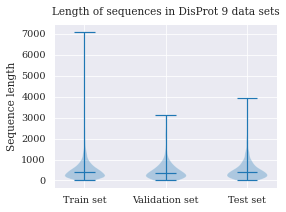

In [24]:
%matplotlib inline
fig, ax = plt.subplots(nrows=1, figsize=(4, 3))

ax.violinplot(dataset = [train_disprot_full['seq_len'], val_disprot_full['seq_len'], test_disprot_full['seq_len']], showmedians=True)
ax.yaxis.grid(True)
ax.set_title('Length of sequences in DisProt 9 data sets', y=1.02)
ax.set_ylabel('Sequence length')
ax.set_xticks([1, 2, 3], ['Train set', 'Validation set', 'Test set'])

fig.savefig('../figures/2022-10-09_thesis_figures/violin_disprot_sequence_length.png', bbox_inches='tight')
plt.show()

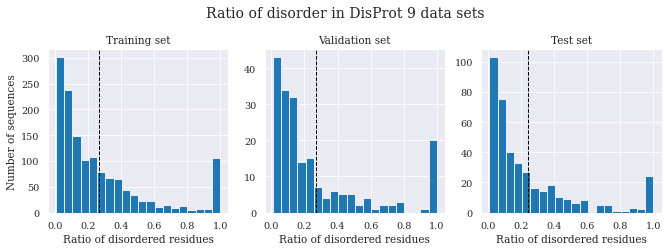

In [25]:
%matplotlib inline
fig, [ax1, ax2, ax3] = plt.subplots(ncols=3, figsize=(11, 3))
fig.suptitle('Ratio of disorder in DisProt 9 data sets', fontsize=14, y=1.08)

ax1.hist(train_disprot_full['disorder_ratio'], bins=20)
ax1.axvline(train_disprot_full['disorder_ratio'].mean(), color='k', linestyle='dashed', linewidth=1)
ax1.set_title('Training set')
ax1.set_ylabel('Number of sequences')
ax1.set_xlabel('Ratio of disordered residues')

ax2.hist(val_disprot_full['disorder_ratio'], bins=20)
ax2.axvline(val_disprot_full['disorder_ratio'].mean(), color='k', linestyle='dashed', linewidth=1)
ax2.set_title('Validation set')
ax2.set_xlabel('Ratio of disordered residues')

ax3.hist(test_disprot_full['disorder_ratio'], bins=20)
ax3.axvline(test_disprot_full['disorder_ratio'].mean(), color='k', linestyle='dashed', linewidth=1)
ax3.set_title('Test set')
ax3.set_xlabel('Ratio of disordered residues')

fig.savefig('../figures/2022-10-09_thesis_figures/hists_disprot_disorder_ratio.png', bbox_inches='tight')
plt.show()

### CheZOD

In [10]:
train_chezod_1 = pd.DataFrame(load_chezod_dataset_two_files('../data/CheZOD/train/CheZOD998_training_set_sequences.fasta.txt','../data/CheZOD/train/CheZOD998_training_set_CheZOD_scores.txt', max_length=10000).rows)
train_chezod_2 = pd.DataFrame(load_chezod_dataset_two_files('../data/CheZOD/train/CheZOD998_training_set2_sequences.fasta.txt','../data/CheZOD/train/CheZOD998_training_set2_CheZOD_scores.txt', max_length=10000).rows)
val_chezod_1 = pd.DataFrame(load_chezod_dataset_two_files('../data/CheZOD/val/CheZOD176_val_set_sequences.fasta.txt','../data/CheZOD/val/CheZOD176_val_set_CheZOD_scores.txt', max_length=10000).rows)
val_chezod_2 = pd.DataFrame(load_chezod_dataset_two_files('../data/CheZOD/val/CheZOD176_val_set2_sequences.fasta.txt','../data/CheZOD/val/CheZOD176_val_set2_CheZOD_scores.txt', max_length=10000).rows)
test_chezod = pd.DataFrame(load_chezod_dataset('../data/CheZOD/test/zscores*.txt', max_length=10000).rows)

In [11]:
train_chezod_1['seq_len'] = train_chezod_1['scores'].apply(lambda scores: len(scores))
train_chezod_2['seq_len'] = train_chezod_2['scores'].apply(lambda scores: len(scores))
val_chezod_1['seq_len'] = val_chezod_1['scores'].apply(lambda scores: len(scores))
val_chezod_2['seq_len'] = val_chezod_2['scores'].apply(lambda scores: len(scores))
test_chezod['seq_len'] = test_chezod['scores'].apply(lambda scores: len(scores))

train_chezod_1['disorder_ratio'] = train_chezod_1['scores'].apply(lambda scores: sum(1 for i in scores if i < 8) / sum(1 for i in scores if i != 999))
train_chezod_2['disorder_ratio'] = train_chezod_2['scores'].apply(lambda scores: sum(1 for i in scores if i < 8) / sum(1 for i in scores if i != 999))
val_chezod_1['disorder_ratio'] = val_chezod_1['scores'].apply(lambda scores: sum(1 for i in scores if i < 8) / sum(1 for i in scores if i != 999))
val_chezod_2['disorder_ratio'] = val_chezod_2['scores'].apply(lambda scores: sum(1 for i in scores if i < 8) / sum(1 for i in scores if i != 999))
test_chezod['disorder_ratio'] = test_chezod['scores'].apply(lambda scores: sum(1 for i in scores if i < 8) / sum(1 for i in scores if i != 999))

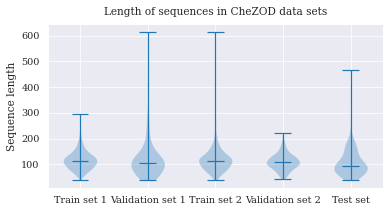

In [26]:
%matplotlib inline
fig, ax = plt.subplots(nrows=1, figsize=(6, 3))

ax.violinplot(dataset = [train_chezod_1['seq_len'], val_chezod_1['seq_len'], train_chezod_2['seq_len'], val_chezod_2['seq_len'], test_chezod['seq_len']], showmedians=True)
ax.yaxis.grid(True)
ax.set_title('Length of sequences in CheZOD data sets', y=1.02)
ax.set_ylabel('Sequence length')
ax.set_xticks([1, 2, 3, 4, 5], ['Train set 1', 'Validation set 1', 'Train set 2', 'Validation set 2', 'Test set'])

fig.savefig('../figures/2022-10-09_thesis_figures/violin_CheZOD_sequence_length.png', bbox_inches='tight')
plt.show()

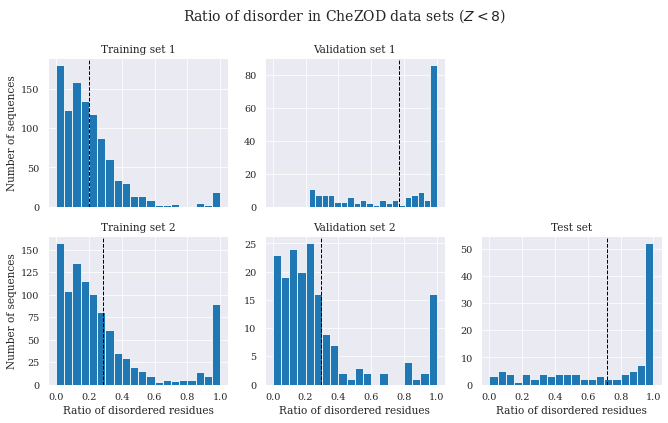

In [31]:
%matplotlib inline
fig, [[ax1, ax2, ax6], [ax3, ax4, ax5]] = plt.subplots(ncols=3, nrows=2, figsize=(11, 6), sharex=True)
fig.suptitle('Ratio of disorder in CheZOD data sets ($Z < 8$)', fontsize=14, y=1)

ax1.hist(train_chezod_1['disorder_ratio'], bins=20)
ax1.axvline(train_chezod_1['disorder_ratio'].mean(), color='k', linestyle='dashed', linewidth=1)
ax1.set_title('Training set 1')
ax1.set_ylabel('Number of sequences')

ax2.hist(val_chezod_1['disorder_ratio'], bins=20)
ax2.axvline(val_chezod_1['disorder_ratio'].mean(), color='k', linestyle='dashed', linewidth=1)
ax2.set_title('Validation set 1')

ax3.hist(train_chezod_2['disorder_ratio'], bins=20)
ax3.axvline(train_chezod_2['disorder_ratio'].mean(), color='k', linestyle='dashed', linewidth=1)
ax3.set_title('Training set 2')
ax3.set_ylabel('Number of sequences')
ax3.set_xlabel('Ratio of disordered residues')

ax4.hist(val_chezod_2['disorder_ratio'], bins=20)
ax4.axvline(val_chezod_2['disorder_ratio'].mean(), color='k', linestyle='dashed', linewidth=1)
ax4.set_title('Validation set 2')
ax4.set_xlabel('Ratio of disordered residues')

ax5.hist(test_chezod['disorder_ratio'], bins=20)
ax5.axvline(test_chezod['disorder_ratio'].mean(), color='k', linestyle='dashed', linewidth=1)
ax5.set_title('Test set')
ax5.set_xlabel('Ratio of disordered residues')

ax6.remove()

fig.savefig('../figures/2022-10-09_thesis_figures/hists_CheZOD_disorder_ratio.png', bbox_inches='tight')
plt.show()

In [15]:
from itertools import chain
import numpy as np

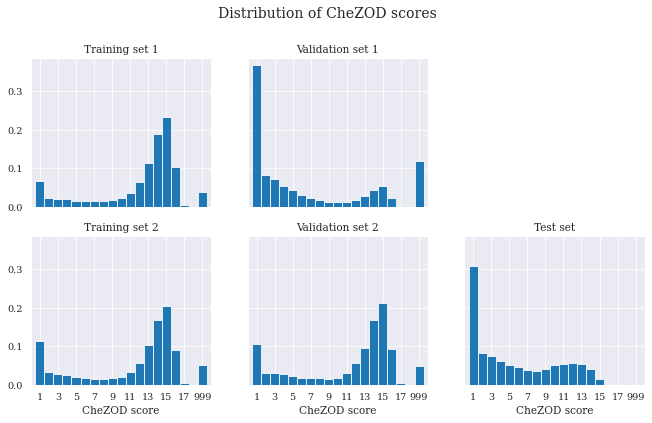

In [29]:
%matplotlib inline
fig, [[ax1, ax2, ax6], [ax3, ax4, ax5]] = plt.subplots(ncols=3, nrows=2, figsize=(11, 6), sharex=True, sharey=True)
fig.suptitle('Distribution of CheZOD scores', fontsize=14, y=1)


def plot_hist(ax, data, title, show_xlabel=False):
    bins = np.arange(0, 20, 1)
    _, bins, patches = ax.hist(np.clip(data, bins[0], bins[-1]), bins=bins, density=True)
    ax.set_title(title)
    if show_xlabel:
        ax.set_xlabel('CheZOD score')

    xlabels = bins[1::2].astype(str)
    xlabels[-1] = "999"
    xticks = 2 * np.arange(len(xlabels)) + 0.5
    ax.set_xlim([-0.5, 19.5])
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels)

plot_hist(ax1, list(chain(*train_chezod_1['scores'].to_list())), 'Training set 1')
plot_hist(ax2, list(chain(*val_chezod_1['scores'].to_list())), 'Validation set 1')
plot_hist(ax3, list(chain(*train_chezod_2['scores'].to_list())), 'Training set 2', True)
plot_hist(ax4, list(chain(*val_chezod_2['scores'].to_list())), 'Validation set 2', True)
plot_hist(ax5, list(chain(*test_chezod['scores'].to_list())), 'Test set', True)

ax6.remove()

fig.savefig('../figures/2022-10-09_thesis_figures/hists_CheZOD_distribution.png', bbox_inches='tight')
plt.show()